In [36]:
import json
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, LSTM, GRU, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt


In [37]:
# Load your JSON file
with open('dataset/final2_json_pak_const.json', 'r') as file:
    data = json.load(file)

# Extract questions and answers
questions = [pair['question'] for pair in data]
answers = [pair['answer'] for pair in data]

# Tokenize the questions
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions)
sequences = tokenizer.texts_to_sequences(questions)
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Calculate vocab_size
vocab_size = len(tokenizer.word_index) + 1  # Plus one for the padding token

# Encode the answers
label_encoder = LabelEncoder()
encoded_answers = label_encoder.fit_transform(answers)

In [38]:
import pickle

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [49]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(set(encoded_answers)), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn_history=model.fit(padded_sequences, encoded_answers, epochs=50, verbose=1)
# Save the LSTM model
model.save('saved_models/ann_chatbot_model.h5')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.0000e+00 - loss: 6.8964
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0133 - loss: 6.8768
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0480 - loss: 6.8146
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0662 - loss: 6.6453
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1248 - loss: 6.0192
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2753 - loss: 4.1886
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6967 - loss: 1.6287 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8358 - loss: 0.7903
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8475 - loss: 0.5182 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8709 - loss: 0.3945 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9017 - loss: 0.3489 
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8978 - loss

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))

# Adding an LSTM layer
model.add(LSTM(128, return_sequences=True))

# Adding a Flatten layer
model.add(Flatten())

# Adding a Batch Normalization layer
model.add(BatchNormalization())

# Adding a Dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Adding a Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Adding another Dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Adding another Dropout layer
model.add(Dropout(0.5))

# Final output layer with softmax activation
model.add(Dense(len(set(encoded_answers)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
lstm_enhanced_history = model.fit(padded_sequences, encoded_answers, epochs=50, verbose=1)

# Save the model
model.save('saved_models/lstm_enhanced_chatbot_model.h5')

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0023 - loss: 6.9124
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0016 - loss: 6.8543
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0077 - loss: 6.7764
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0247 - loss: 6.5505
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0324 - loss: 6.2242
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0300 - loss: 5.9517
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0474 - loss: 5.7034
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0640 - loss: 5.3798
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0915 - loss: 5.0812
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1127 - loss: 4.8053
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1013 - loss: 4.7698
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1263 - lo

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))

# Adding a GRU layer
model.add(GRU(128, return_sequences=True))

# Adding a Flatten layer
model.add(Flatten())

# Adding a Batch Normalization layer
model.add(BatchNormalization())

# Adding a Dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Adding a Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Adding another Dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Adding another Dropout layer
model.add(Dropout(0.5))

# Final output layer with softmax activation
model.add(Dense(len(set(encoded_answers)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
gru_enhanced_history = model.fit(padded_sequences, encoded_answers, epochs=150, verbose=1)

# Save the model
model.save('saved_models/gru_enhanced_chatbot_model.h5')


Epoch 1/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 5.6458e-04 - loss: 6.9043
Epoch 2/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0068 - loss: 6.8338
Epoch 3/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0146 - loss: 6.6632
Epoch 4/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0402 - loss: 6.3527
Epoch 5/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0412 - loss: 5.9524
Epoch 6/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0619 - loss: 5.5382
Epoch 7/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0841 - loss: 5.2750
Epoch 8/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0924 - loss: 5.0055
Epoch 9/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1085 - loss: 4.7472
Epoch 10/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1258 - loss: 4.6930
Epoch 11/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1540 - loss: 4.4455
Epoch 12/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accur

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))

# Adding a Conv1D layer
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())

# Adding a Flatten layer
model.add(Flatten())

# Adding a Batch Normalization layer
model.add(BatchNormalization())

# Adding a Dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Adding a Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Adding another Dense layer with 64 units and ReLU activation
model.add(Dense(64, activation='relu'))

# Adding another Dropout layer
model.add(Dropout(0.5))

# Final output layer with softmax activation
model.add(Dense(len(set(encoded_answers)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_enhanced_history = model.fit(padded_sequences, encoded_answers, epochs=50, verbose=1)

# Save the model
model.save('saved_models/cnn_enhanced_chatbot_model.h5')


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.0022 - loss: 6.8984
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0090 - loss: 6.8387
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0015 - loss: 6.7608    
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0134 - loss: 6.6068
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0247 - loss: 6.4013
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0332 - loss: 6.0692
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0486 - loss: 5.8094
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0734 - loss: 5.4963
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0812 - loss: 5.2443
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0978 - loss: 4.9172
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1004 - loss: 4.8249
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.12

In [43]:
from tensorflow.keras.layers import LSTM

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))
lstm_model.add(LSTM(128))
lstm_model.add(Dense(len(set(encoded_answers)), activation='softmax'))

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(padded_sequences, encoded_answers, epochs=50, verbose=1, validation_split=0.2)
# Save the LSTM model
lstm_model.save('saved_models/lstm_chatbot_model.h5')

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0000e+00 - loss: 6.8846 - val_accuracy: 0.0000e+00 - val_loss: 6.8878
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 6.8805 - val_accuracy: 0.0000e+00 - val_loss: 6.9311
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 6.8652 - val_accuracy: 0.0000e+00 - val_loss: 7.9062
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0099 - loss: 6.7748 - val_accuracy: 0.0000e+00 - val_loss: 7.1743
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0046 - loss: 6.8011 - val_accuracy: 0.0000e+00 - val_loss: 8.7851
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 6.4643e-04 - loss: 6.7118 - val_accuracy: 0.0000e+00 - val_loss: 8.9439
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0069 - loss: 6.6937 - val_accuracy: 0.0000e+00 - val_loss: 9.1126
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0026 - lo

In [44]:
from tensorflow.keras.layers import GRU

# Define the GRU model
gru_model = Sequential()
gru_model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))
gru_model.add(GRU(128))
gru_model.add(Dense(len(set(encoded_answers)), activation='softmax'))

gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
gru_history = gru_model.fit(padded_sequences, encoded_answers, epochs=100, verbose=1)
# Save the GRU model
gru_model.save('saved_models/gru_chatbot_model.h5')

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 6.8863
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 6.8888
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0019 - loss: 6.8843
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0050 - loss: 6.8834
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 6.7290e-04 - loss: 6.8822
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 7.6139e-04 - loss: 6.8818
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0076 - loss: 6.8810
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0041 - loss: 6.8816
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0025 - loss: 6.8812
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0027 - loss: 6.8814
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0031 - loss: 6.8804
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

In [45]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(len(set(encoded_answers)), activation='softmax'))

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(padded_sequences, encoded_answers, epochs=50, verbose=1)
# Save the CNN model
cnn_model.save('saved_models/cnn_chatbot_model.h5')

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.0041 - loss: 6.8880
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0025 - loss: 6.8813     
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0027 - loss: 6.8750     
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0188 - loss: 6.8566 
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0120 - loss: 6.7923     
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0142 - loss: 6.5508     
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0255 - loss: 5.9752     
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0718 - loss: 4.9553 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3131 - loss: 3.4960
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5849 - loss: 2.1860
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7312 - loss: 1.2945
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

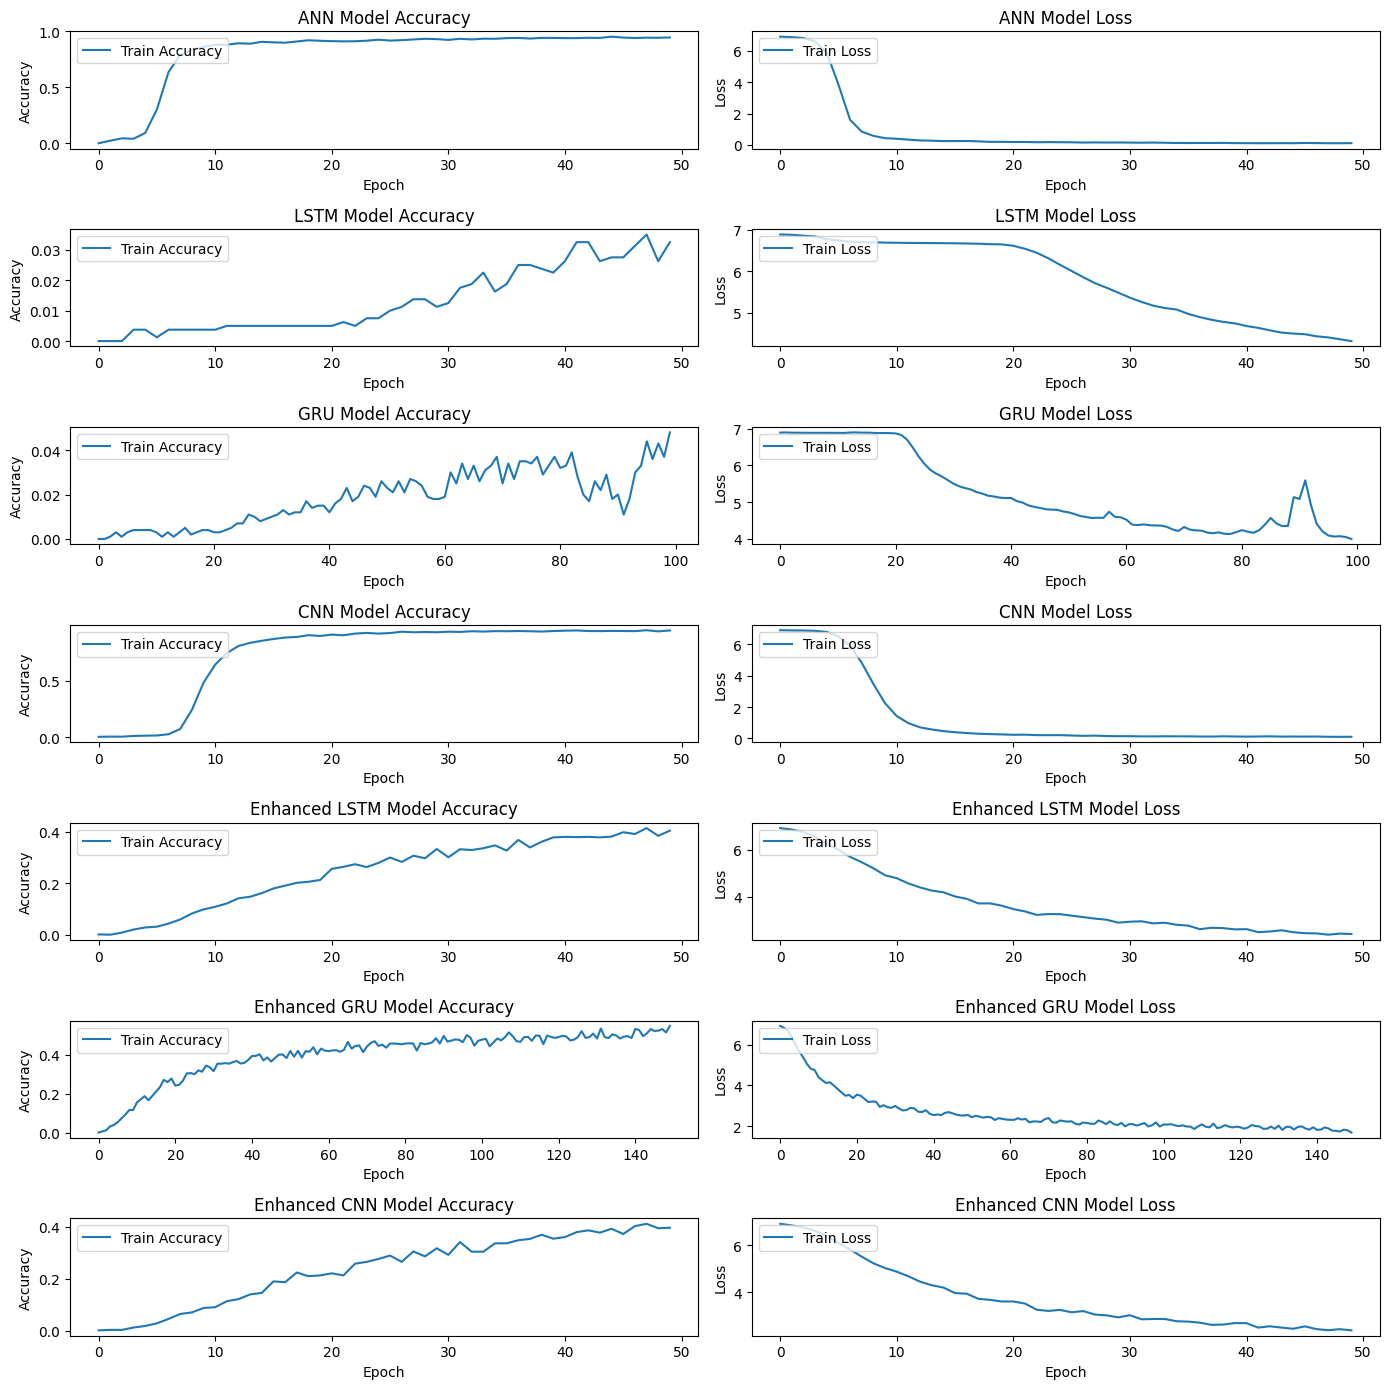

In [51]:
import matplotlib.pyplot as plt

# Plotting function for comparison
def plot_comparison(histories, titles):
    plt.figure(figsize=(14, 14))  # Increased height for more models

    for i, history in enumerate(histories):
        # Accuracy plot
        plt.subplot(len(histories), 2, 2*i + 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.title(f'{titles[i]} Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(loc='upper left')

        # Loss plot
        plt.subplot(len(histories), 2, 2*i + 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.title(f'{titles[i]} Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Example usage (adjust according to the histories you've stored)
plot_comparison(
    [dnn_history, lstm_history, gru_history, cnn_history, lstm_enhanced_history, gru_enhanced_history, cnn_enhanced_history],
    ['ANN', 'LSTM', 'GRU', 'CNN', 'Enhanced LSTM', 'Enhanced GRU', 'Enhanced CNN']
)

In [52]:
import pandas as pd

# Extract final accuracy and loss for each model
model_performance = {
    'Model': ['ANN', 'LSTM', 'GRU', 'CNN', 'Enhanced LSTM', 'Enhanced GRU', 'Enhanced CNN'],
    'Final Train Accuracy': [
        dnn_history.history['accuracy'][-1],
        lstm_history.history['accuracy'][-1],
        gru_history.history['accuracy'][-1],
        cnn_history.history['accuracy'][-1],
        lstm_enhanced_history.history['accuracy'][-1],
        gru_enhanced_history.history['accuracy'][-1],
        cnn_enhanced_history.history['accuracy'][-1]
    ],
    'Final Train Loss': [
        dnn_history.history['loss'][-1],
        lstm_history.history['loss'][-1],
        gru_history.history['loss'][-1],
        cnn_history.history['loss'][-1],
        lstm_enhanced_history.history['loss'][-1],
        gru_enhanced_history.history['loss'][-1],
        cnn_enhanced_history.history['loss'][-1]
    ]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the table
print(performance_df)

           Model  Final Train Accuracy  Final Train Loss
0            ANN              0.945946          0.116756
1           LSTM              0.032541          4.311652
2            GRU              0.048048          3.999206
3            CNN              0.949950          0.106802
4  Enhanced LSTM              0.404404          2.429186
5   Enhanced GRU              0.546547          1.686850
6   Enhanced CNN              0.396396          2.389603


In [66]:
from tensorflow.keras.models import load_model

# Load the models
ann_model = load_model('saved_models/ann_chatbot_model.h5')
lstm_model = load_model('saved_models/lstm_chatbot_model.h5')
gru_model = load_model('saved_models/gru_chatbot_model.h5')
cnn_model = load_model('saved_models/cnn_chatbot_model.h5')
lstm_enhanced_model = load_model('saved_models/lstm_enhanced_chatbot_model.h5')
gru_enhanced_model = load_model('saved_models/gru_enhanced_chatbot_model.h5')
cnn_enhanced_model = load_model('saved_models/cnn_enhanced_chatbot_model.h5')

# Now you can use these models in your prediction loop

In [67]:
def predict_answer(question, model):
    seq = tokenizer.texts_to_sequences([question])
    padded_seq = pad_sequences(seq, maxlen=max_length, padding='post')
    prediction = np.argmax(model.predict(padded_seq), axis=-1)
    return label_encoder.inverse_transform(prediction)[0]

# Get the first two questions and their correct answers from your dataset
first_two_questions = questions[:2]
first_two_answers = answers[:2]

# Loop through the first two questions and get predictions from all models
for i, question in enumerate(first_two_questions):
    print(f"Question {i+1}: {question}")
    print(f"Correct Answer {i+1}: {first_two_answers[i]}")

    # Test with LSTM model
    predicted_answer_ann = predict_answer(question, ann_model)
    print(f"ANN Predicted Answer: {predicted_answer_ann}")

    # Test with LSTM model
    predicted_answer_lstm = predict_answer(question, lstm_model)
    print(f"LSTM Predicted Answer: {predicted_answer_lstm}")

    # Test with GRU model
    predicted_answer_gru = predict_answer(question, gru_model)
    print(f"GRU Predicted Answer: {predicted_answer_gru}")

    # Test with CNN model
    predicted_answer_cnn = predict_answer(question, cnn_model)
    print(f"CNN Predicted Answer: {predicted_answer_cnn}")

    # Test with Enhanced LSTM model
    predicted_answer_enhanced_lstm = predict_answer(question, lstm_enhanced_model)
    print(f"Enhanced LSTM Predicted Answer: {predicted_answer_enhanced_lstm}")

    # Test with Enhanced GRU model
    predicted_answer_enhanced_gru = predict_answer(question, gru_enhanced_model)
    print(f"Enhanced GRU Predicted Answer: {predicted_answer_enhanced_gru}")

    # Test with Enhanced CNN model
    predicted_answer_enhanced_cnn = predict_answer(question, cnn_enhanced_model)
    print(f"Enhanced CNN Predicted Answer: {predicted_answer_enhanced_cnn}")

    print("\n" + "-"*50 + "\n")

Question 1: Question: When was the Constitution of the Islamic Republic of Pakistan passed and authenticated by the President of the Assembly?
Correct Answer 1: Answer: The Constitution of the Islamic Republic of Pakistan was passed on 10th April 1973 and authenticated by the President of the Assembly on 12th April 1973.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
ANN Predicted Answer: Answer: The Constitution of the Islamic Republic of Pakistan was passed on 10th April 1973 and authenticated by the President of the Assembly on 12th April 1973.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
LSTM Predicted Answer: Answer: According to the text, the President has the power to direct the Governor of any province to discharge as his Agent. This can be either generally or in any particular matter, relating to such areas in the Federation which are not included in any Province as may be specified in the direction.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
GRU Predicted Answer: Answer: The legal practitioner s